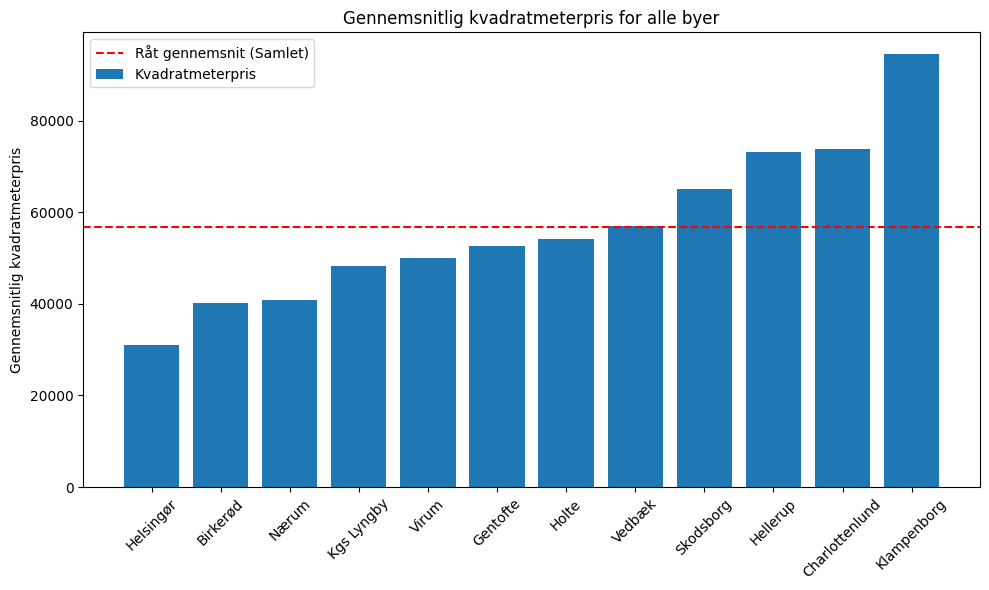

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV-files for all 12 cities
cities = {'2800': 'Kgs Lyngby', '2820': 'Gentofte', '2830': 'Virum', '2840': 'Holte', '2850': 'Nærum', '2900': 'Hellerup', '2920': 'Charlottenlund', '2930': 'Klampenborg', '2942': 'Skodsborg', '2950': 'Vedbæk', '3000': 'Helsingør', '3460': 'Birkerød'}
dataframes = []

for city in cities:
    filename = f'./data/house_data/house_data_{city}.csv'
    df = pd.read_csv(filename)
    dataframes.append(df)

# Calculate average squaremeter price for all 12 cities
avg_all_cities = []

for df in dataframes:
    average = df['Squaremeter price'].mean()
    avg_all_cities.append(average)

# Sorter by stigende gennemsnitspris
sorted_avg_all_cities, sorted_cities = zip(*sorted(zip(avg_all_cities, cities.values())))

# Calculate raw average (does not take into account how many for sale in each city)
avg_raw = sum(sorted_avg_all_cities) / len(sorted_avg_all_cities)

# Plots
plt.figure(figsize=(10, 6))
plt.bar(sorted_cities, sorted_avg_all_cities, label='Kvadratmeterpris')

plt.axhline(y=avg_raw, color='red', linestyle='--', label='Råt gennemsnit (Samlet)')
plt.ylabel('Gennemsnitlig kvadratmeterpris')
plt.title('Gennemsnitlig kvadratmeterpris for alle byer')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


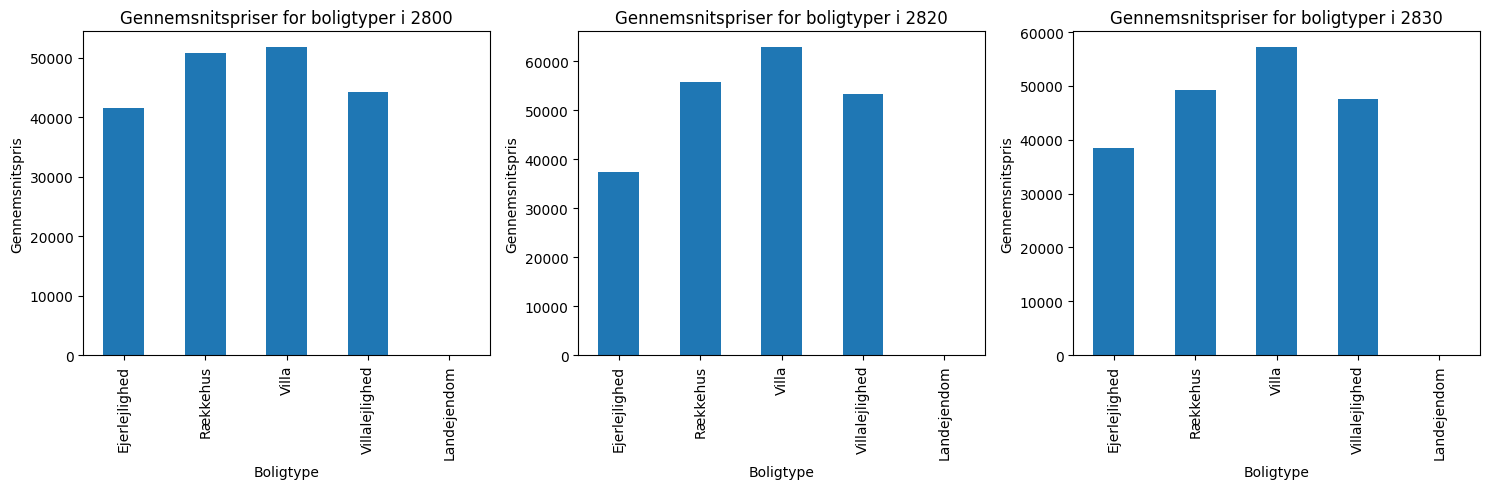

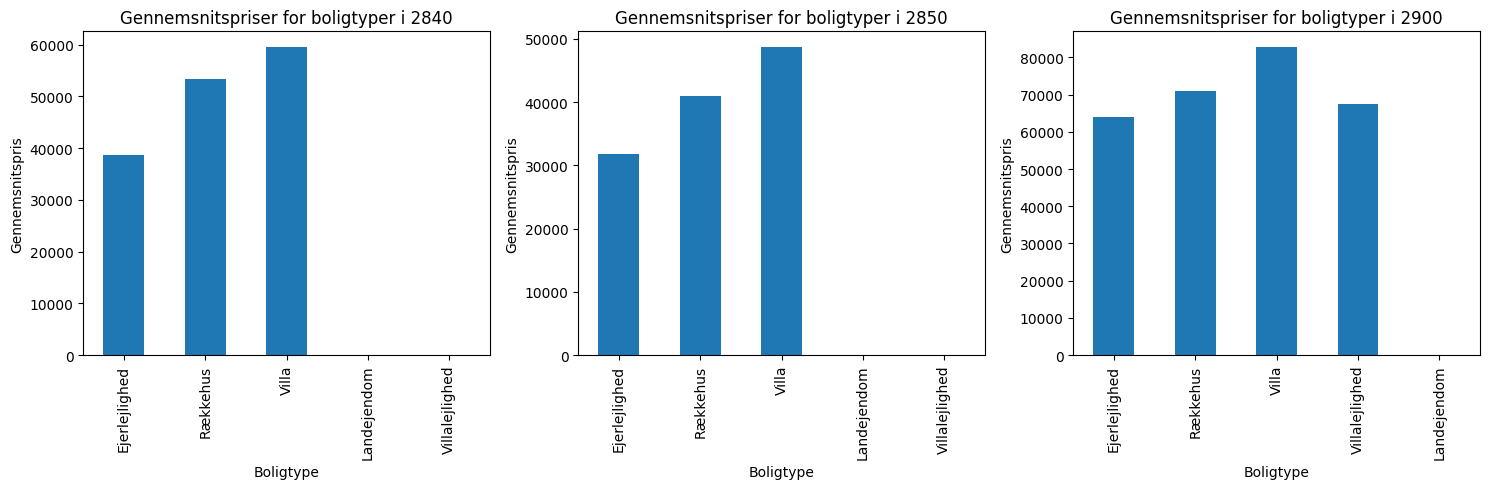

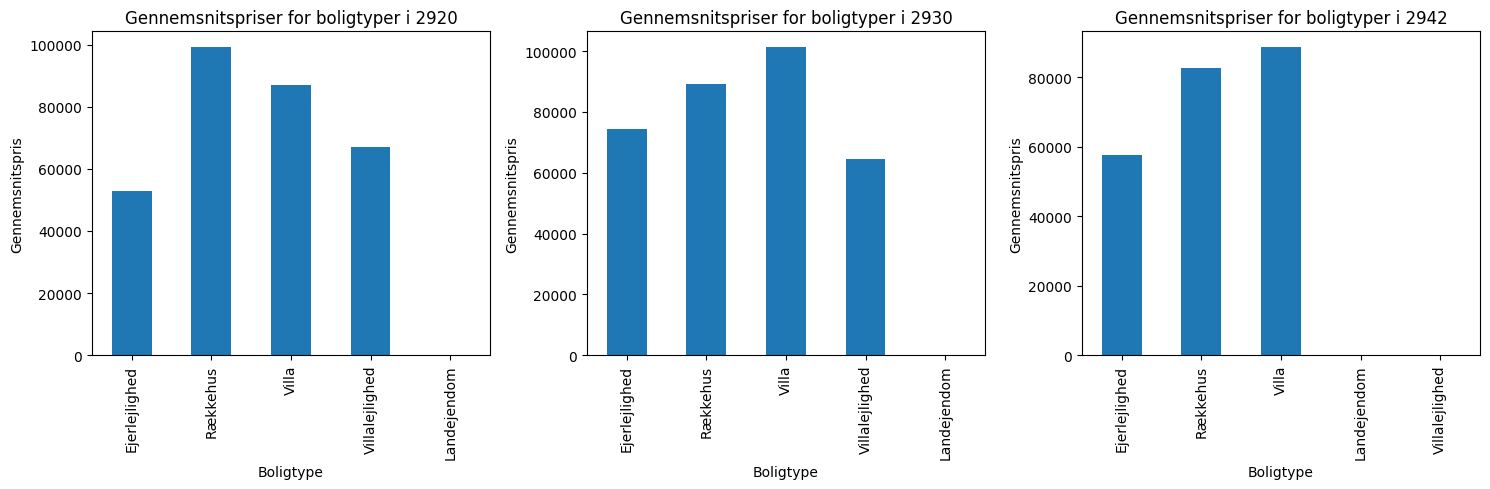

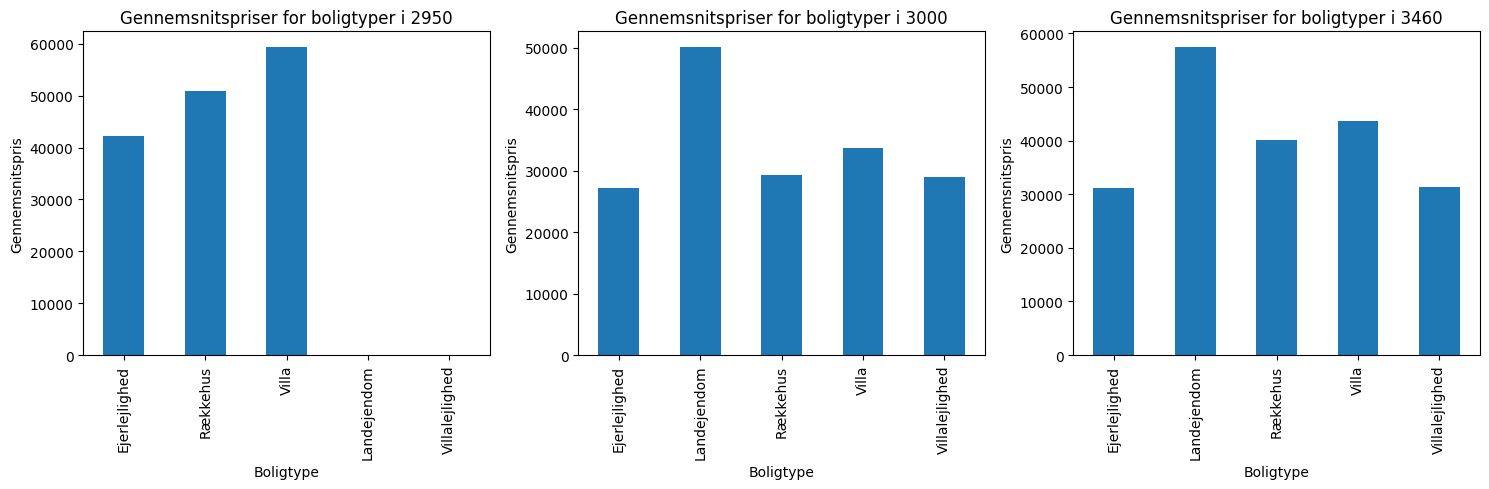

In [3]:
# Denne kode viser gennemsnitsprisen for forskellige boligtyper opdelt efter postnumre

import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV-files for all 12 cities
cities = ['2800', '2820', '2830', '2840', '2850', '2900', '2920', '2930', '2942', '2950', '3000', '3460']
dataframes = []

for city in cities:
    filename = f'./data/house_data/house_data_{city}.csv'
    df = pd.read_csv(filename)
    dataframes.append(df)

# Calculate average squaremeter price for each city and type
averages = {}

# Set the number of plots per row
plots_per_row = 3

for i, (df, city) in enumerate(zip(dataframes, cities)):
    city_averages = df.groupby('Type')['Squaremeter price'].mean()
    all_types = ['Ejerlejlighed' ,'Landejendom','Rækkehus', 'Villalejlighed', 'Villa']  # Alle mulige typer
    
    # Loop gennem alle typer og tjek om de findes i city_averages
    for typ in all_types:
        if typ not in city_averages.index:
            # Hvis typen mangler, sæt gennemsnitsprisen til 0
            city_averages[typ] = 0
    
    
    # Opret en ny figur og akse for hver by
    if i % plots_per_row == 0:
        fig, axs = plt.subplots(nrows=1, ncols=plots_per_row, figsize=(15, 5))
    
    # Beregn række- og kolonneindeks for subplot
    row_index = i // plots_per_row
    col_index = i % plots_per_row
    
    # Lav et bar plot af gennemsnitspriserne
    city_averages.plot(kind='bar', ax=axs[col_index])
    
    # Tilføj titel og labels til plottet
    axs[col_index].set_title(f'Gennemsnitspriser for boligtyper i {city}')
    axs[col_index].set_xlabel('Boligtype')
    axs[col_index].set_ylabel('Gennemsnitspris')
    
    # Vis plottet for den aktuelle by
    if (i + 1) % plots_per_row == 0 or i == len(dataframes) - 1:
        plt.tight_layout()
        plt.show()


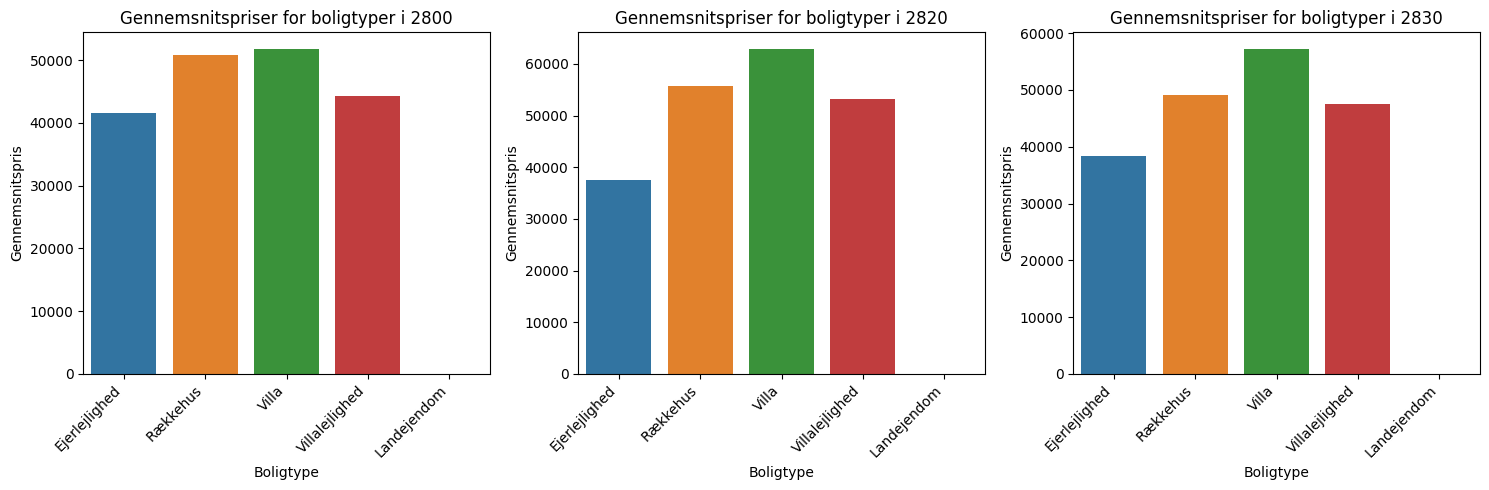

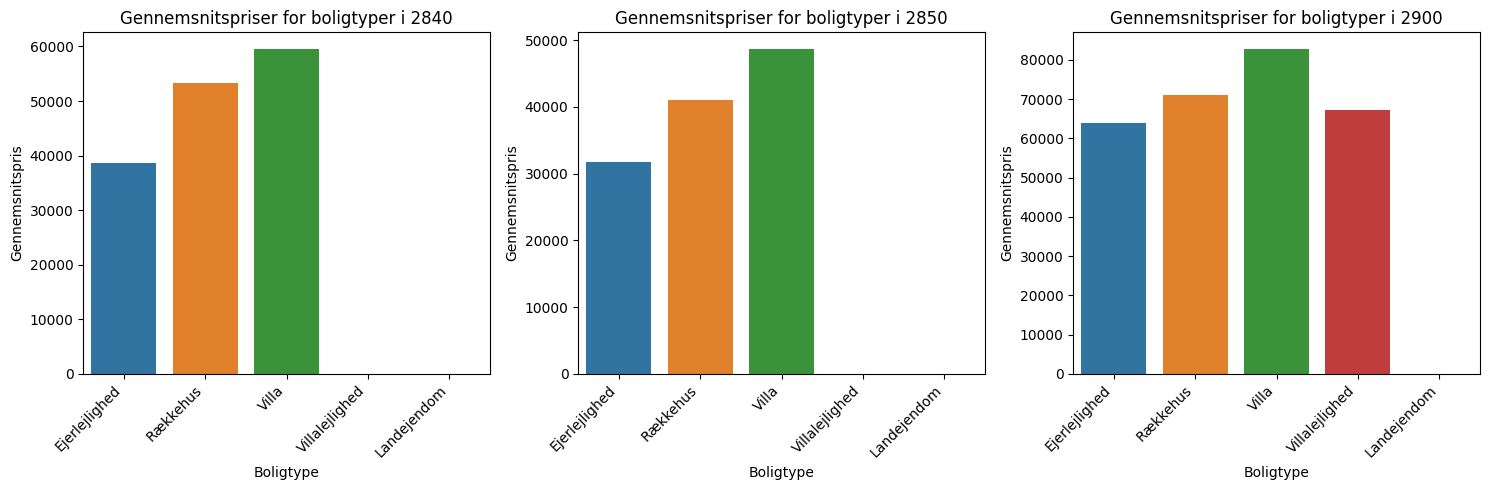

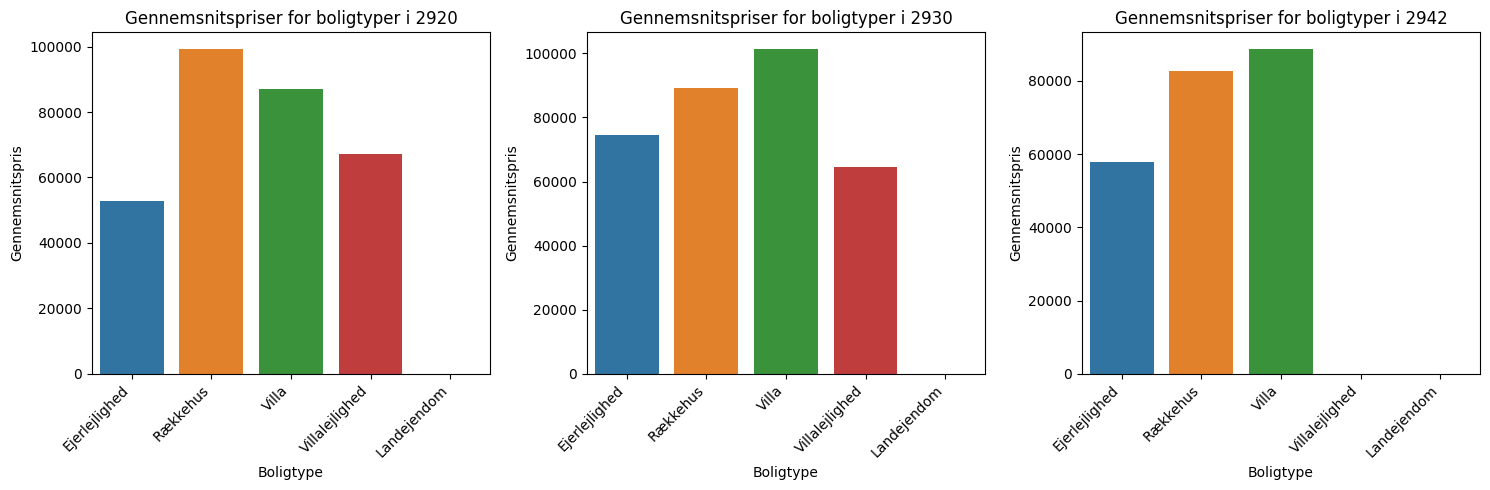

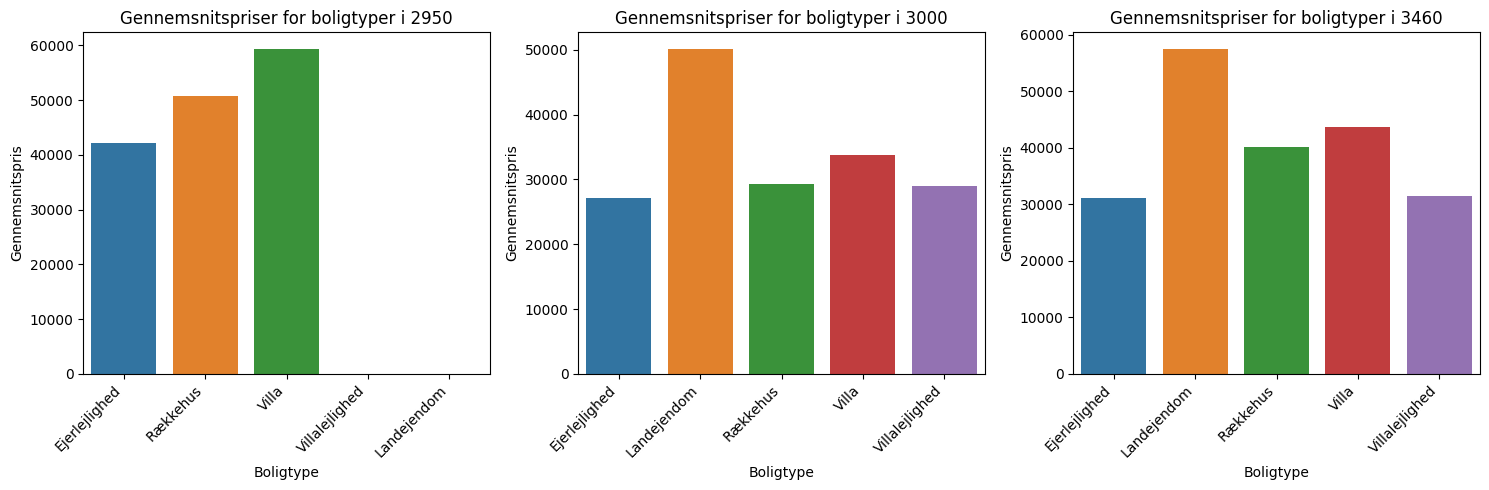

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read data from CSV-files for all 12 cities
cities = ['2800', '2820', '2830', '2840', '2850', '2900', '2920', '2930', '2942', '2950', '3000', '3460']
dataframes = []

for city in cities:
    filename = f'./data/house_data/house_data_{city}.csv'
    df = pd.read_csv(filename)
    dataframes.append(df)

# Calculate average squaremeter price for each city and type
averages = {}

# Set the number of plots per row
plots_per_row = 3

for i, (df, city) in enumerate(zip(dataframes, cities)):
    city_averages = df.groupby('Type')['Squaremeter price'].mean()
    all_types = ['Ejerlejlighed', 'Rækkehus', 'Villalejlighed', 'Villa', 'Landejendom']  # Alle mulige typer
    
    # Loop through typer
    for typ in all_types:
        if typ not in city_averages.index:
            city_averages[typ] = 0
    

    # Create new figure and axix for each line of subplots
    if i % plots_per_row == 0:
        fig, axs = plt.subplots(nrows=1, ncols=plots_per_row, figsize=(15, 5))
    
    # Calculate row- and coloumnindex for subplot
    row_index = i // plots_per_row
    col_index = i % plots_per_row
    
    # Use Seaborn 
    sns.barplot(x=city_averages.index, y=city_averages.values, ax=axs[col_index])
    
    # Add title and labels to plot
    axs[col_index].set_title(f'Gennemsnitspriser for boligtyper i {city}')
    axs[col_index].set_xlabel('Boligtype')
    axs[col_index].set_ylabel('Gennemsnitspris')
    axs[col_index].set_xticklabels(axs[col_index].get_xticklabels(), rotation=45, ha='right')
    
    # Show plot for city
    if (i + 1) % plots_per_row == 0 or i == len(dataframes) - 1:
        plt.tight_layout()
        plt.show()


In [45]:
# Kombinere dataframes til en dataframe og fjerne NaN værdier

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

cities = ['2800', '2820', '2830', '2840', '2850', '2900', '2920', '2930', '2942', '2950', '3000', '3460']

dataframes = []

for city in cities:
    filename = f'./data/house_data/house_data_{city}.csv'
    df = pd.read_csv(filename)
    dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)    

# Vis hele dataframe uden begrænsninger
pd.set_option("display.max_rows", None)  # Vis alle rækker

# Fjern rækker med NaN-værdier
combined_df = combined_df.dropna()

# Nulstil indekset i den opdaterede dataframe
combined_df = combined_df.reset_index(drop=True)



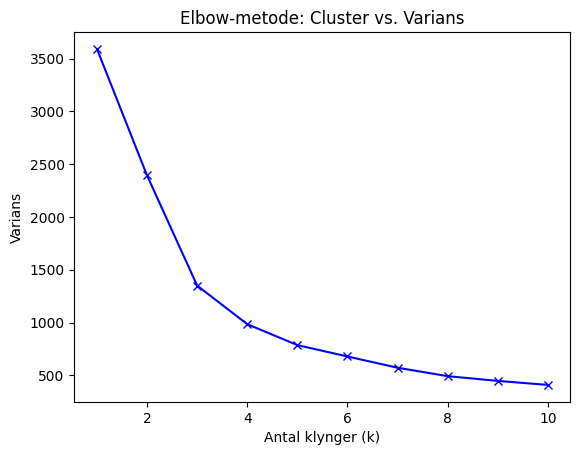

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

cities = ['2800', '2820', '2830', '2840', '2850', '2900', '2920', '2930', '2942', '2950', '3000', '3460']


dataframes = []

for city in cities:
    filename = f'./data/house_data/house_data_{city}.csv'
    df = pd.read_csv(filename)
    dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)    

# Prepare your data
numerical_features = combined_df[['X', 'Y', 'Squaremeter price']]

# Standardize the numerical features
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)

# Perform Spatial Clustering using K-means
k_values = range(1, 11)  # Defining the range of k values to evaluate
variances = []

# Calculate the variance for each k value
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(numerical_features_scaled)
    variances.append(kmeans.inertia_)

# Plot the cluster vs. variance graph
plt.plot(k_values, variances, 'bx-')
plt.xlabel('Antal klynger (k)')
plt.ylabel('Varians')
plt.title('Elbow-metode: Cluster vs. Varians')
plt.show()


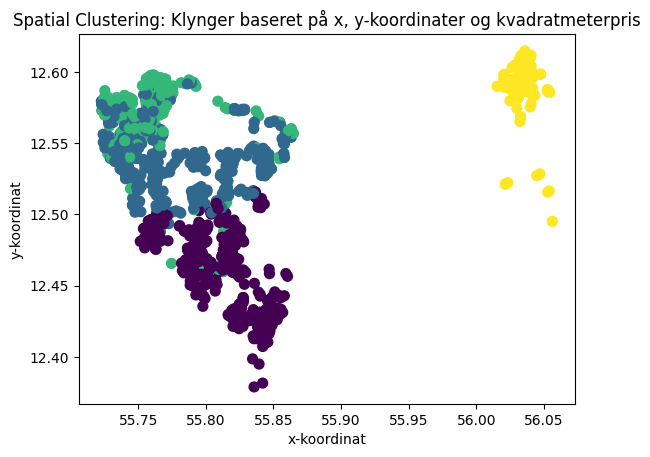

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

cities = ['2800', '2820', '2830', '2840', '2850', '2900', '2920', '2930', '2942', '2950', '3000', '3460']

dataframes = []

for city in cities:
    filename = f'./data/house_data/house_data_{city}.csv'
    df = pd.read_csv(filename)
    dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)    

# Prepare your data
numerical_features = combined_df[['X', 'Y', 'Squaremeter price']]

# Standardize the numerical features
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)

# Perform Spatial Clustering using K-means with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(numerical_features_scaled)

# Get the cluster assignments for each data point
cluster_labels = kmeans.predict(numerical_features_scaled)

# Add cluster labels as a new column in the dataframe
combined_df["Cluster"] = cluster_labels

# Visualize the clusters
plt.scatter(combined_df["X"], combined_df["Y"], c=combined_df["Cluster"], s=50)
plt.xlabel("x-koordinat")
plt.ylabel("y-koordinat")
plt.title("Spatial Clustering: Klynger baseret på x, y-koordinater og kvadratmeterpris")

# Show the plot
plt.show()


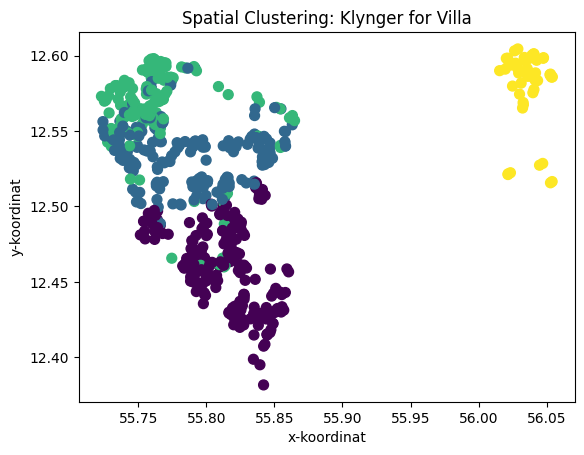

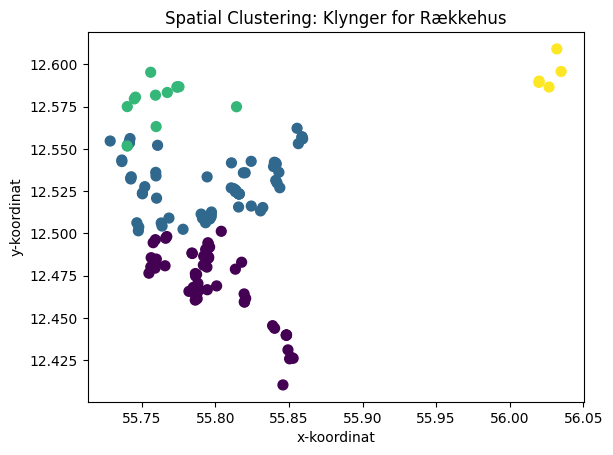

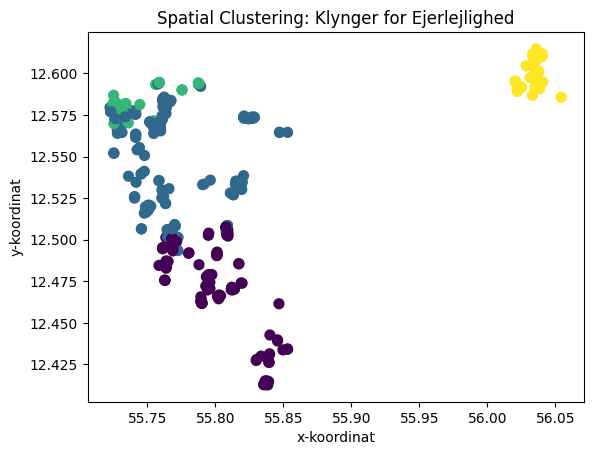

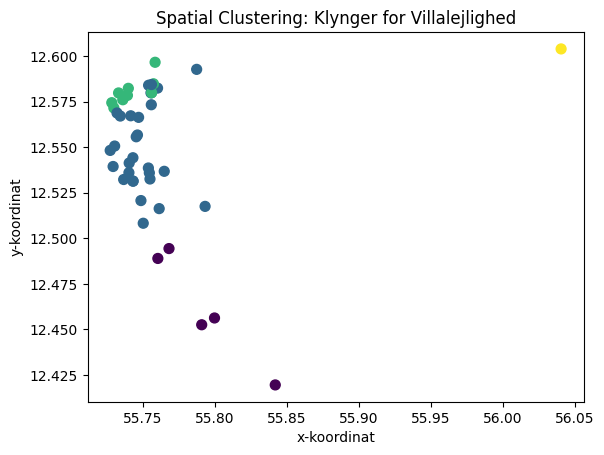

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

cities = ['2800', '2820', '2830', '2840', '2850', '2900', '2920', '2930', '2942', '2950', '3000', '3460']

villa_df = combined_df[combined_df['Type'] == 'Villa']
raekkehus_df = combined_df[combined_df['Type'] == 'Rækkehus']
ejerlejlighed_df = combined_df[combined_df['Type'] == 'Ejerlejlighed']
villalejlighed_df = combined_df[combined_df['Type'] == 'Villalejlighed']

# Villa
villa_numerical_features = villa_df[['X', 'Y', 'Squaremeter price']]
villa_numerical_features_scaled = scaler.transform(villa_numerical_features)
villa_cluster_labels = kmeans.predict(villa_numerical_features_scaled)
villa_df.loc[:, "Cluster"] = villa_cluster_labels

# Rækkehus
raekkehus_numerical_features = raekkehus_df[['X', 'Y', 'Squaremeter price']]
raekkehus_numerical_features_scaled = scaler.transform(raekkehus_numerical_features)
raekkehus_cluster_labels = kmeans.predict(raekkehus_numerical_features_scaled)
raekkehus_df.loc[:, "Cluster"] = raekkehus_cluster_labels

# Ejerlejlighed
ejerlejlighed_numerical_features = ejerlejlighed_df[['X', 'Y', 'Squaremeter price']]
ejerlejlighed_numerical_features_scaled = scaler.transform(ejerlejlighed_numerical_features)
ejerlejlighed_cluster_labels = kmeans.predict(ejerlejlighed_numerical_features_scaled)
ejerlejlighed_df.loc[:, "Cluster"] = ejerlejlighed_cluster_labels

# Villalejlighed
villalejlighed_numerical_features = villalejlighed_df[['X', 'Y', 'Squaremeter price']]
villalejlighed_numerical_features_scaled = scaler.transform(villalejlighed_numerical_features)
villalejlighed_cluster_labels = kmeans.predict(villalejlighed_numerical_features_scaled)
villalejlighed_df.loc[:, "Cluster"] = villalejlighed_cluster_labels

# Villa
plt.scatter(villa_df["X"], villa_df["Y"], c=villa_df["Cluster"], s=50)
plt.xlabel("x-koordinat")
plt.ylabel("y-koordinat")
plt.title("Spatial Clustering: Klynger for Villa")
plt.show()

# Rækkehus
plt.scatter(raekkehus_df["X"], raekkehus_df["Y"], c=raekkehus_df["Cluster"], s=50, cmap='viridis')
plt.xlabel("x-koordinat")
plt.ylabel("y-koordinat")
plt.title("Spatial Clustering: Klynger for Rækkehus")
plt.show()

# Ejerlejlighed
plt.scatter(ejerlejlighed_df["X"], ejerlejlighed_df["Y"], c=ejerlejlighed_df["Cluster"], s=50, cmap='viridis')
plt.xlabel("x-koordinat")
plt.ylabel("y-koordinat")
plt.title("Spatial Clustering: Klynger for Ejerlejlighed")
plt.show()

# Villalejlighed
plt.scatter(villalejlighed_df["X"], villalejlighed_df["Y"], c=villalejlighed_df["Cluster"], s=50, cmap='viridis')
plt.xlabel("x-koordinat")
plt.ylabel("y-koordinat")
plt.title("Spatial Clustering: Klynger for Villalejlighed")
plt.show()



In [75]:
#Vintappervej 16 55.763259,12.51509,5500000,Villa,149,36912,C Forudset pris: 7953030
#Hjortekærbakken 30,55.799086,12.539325,6495000,Villa,107,60700,G Forudset pris: Forudset pris: 6328837
#"Mølleåparken 15, 1. tv",55.795233,12.503967,3800000,Ejerlejlighed 81 3829112
#Fuglevadsvej 20,55.781487,12.500922,7700000,Villa,130 Forudset pris: 7369990
#Nymøllevej 43,55.800777,12.515891,8995000,Villa,163 Forudset pris: 8150372
#Christian X's Alle 108,55.764696,12.499532,11495000,Villa,186 Forudset pris: 10300725
#Christiansholms Tværvej 14,55.773883,12.58572,27800000,Villa,270 Forudset pris: 26532131
#Keilstruplund 16,55.84022,12.443929,4995000,Rækkehus,132,37840,C Forudset pris: 5298244
#øgebakken 3,55.827705,12.441655,6195000,Villa,114 Forudset pris: 5040238
#Birkebakken 39,55.825987,12.437059,7995000,Villa,240 Forudset pris: 8536721



# Indsamle data for den specifikke bolig
new_data = {
    'X': 55.757992,
    'Y': 12.581189,
    'Type': 'Villa',
    'Size': 190,
    'City': '2920'
}

# Opret en DataFrame med den nye boligdata
new_df = pd.DataFrame([new_data])

# Anvend kortlægningsfunktioner og konverter kategoriske features
new_df['Type'] = new_df['Type'].apply(map_type_class)
new_df['City'] = label_encoder.transform(new_df['City'])

# Forudsig prisen på den nye bolig
prediction = int(best_model.predict(new_df))

print("Forudset pris:", prediction)





Forudset pris: 15164580
